# MNIST dataset

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
- datasets are included in the module `tf.keras.datasets`

In [1]:
import tensorflow as tf

#### Load the data

In [3]:
mnist = tf.keras.datasets.mnist

In [6]:
type(mnist)

module

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 24s 2us/step


((60000, 28, 28), (10000, 28, 28))

In [9]:
X_train, X_test = X_train/255.0, X_test/255.0

#### Build the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

### Dropout

- It is added for `regularization` so that the neuron don't rely or emphasize on only one feature.
- It also reduce the probability of overfitting

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 226us/sample - loss: 0.2927 - accuracy: 0.9146 - val_loss: 0.1465 - val_accuracy: 0.9556
Epoch 2/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.1410 - accuracy: 0.9589 - val_loss: 0.1032 - val_accuracy: 0.9686
Epoch 3/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1050 - accuracy: 0.9674 - val_loss: 0.0877 - val_accuracy: 0.9729
Epoch 4/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0845 - accuracy: 0.9736 - val_loss: 0.0760 - val_accuracy: 0.9761
Epoch 5/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0722 - accuracy: 0.9767 - val_loss: 0.0730 - val_accuracy: 0.9771
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0636 - accuracy: 0.9798 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 7/10
60000/60000 [========================

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

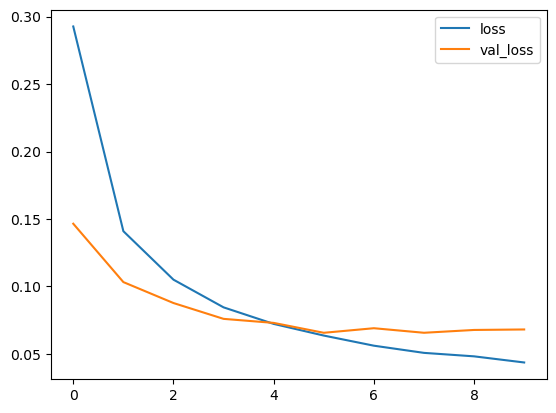

In [15]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

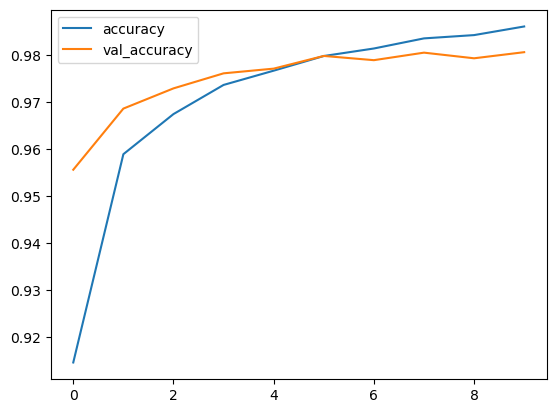

In [16]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [17]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0681 - accuracy: 0.9806


[0.06810335721632582, 0.9806]

In [26]:
y_pred = model.predict(X_test)
y_pred.shape, y_test.shape

((10000, 10), (10000,))

##### `argmax()`

we'll get 10 probabilites in every rows(10000). We want to take the highest value among them.

In [31]:
y_pred = y_pred.argmax(axis=1)
y_pred.shape

(10000,)

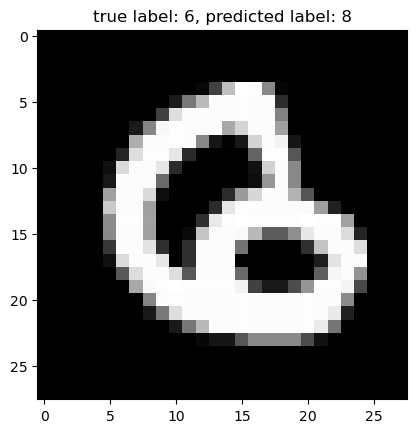

In [33]:
# show some misclassified examples
missclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(X_test[i], cmap="gray")
plt.title(f"true label: {y_test[i]}, predicted label: {y_pred[i]}");

In [34]:
len(missclassified_idx)

194